## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [109]:
import pandas as pd
import matplotlib.pyplot as plt 
from os.path import join
%matplotlib inline

directory = 'babynames'
df = pd.DataFrame()

for i in range(1880, 2011):
    file = 'yob{}.txt'.format(i)
    new_df = pd.read_csv(join(directory, file), names=['name', 'sex', 'numbers', 'year'])
    new_df['year'] = i
    df = new_df if df.empty else df.append(new_df)

df

,name,sex,numbers,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [111]:
df2 = df.groupby(['year', 'sex'], as_index=False).sum()
df2.head()

,year,sex,numbers
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1488ae278>],
      dtype=object)

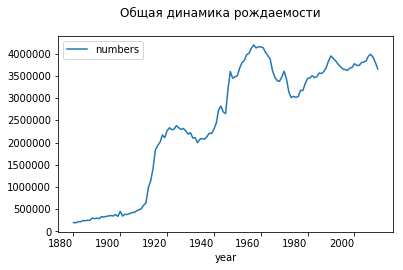

In [114]:
df2.groupby('year').sum().plot(subplots=True, rot=0, sharey=True, legend=True, title='Общая динамика рождаемости')

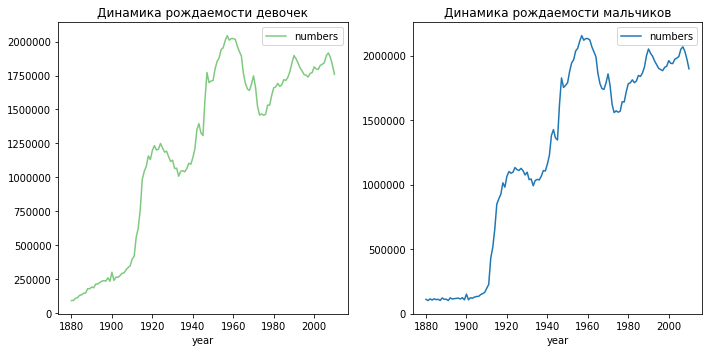

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df2[df2['sex'].values == 'F'].plot(x='year', title='Динамика рождаемости девочек', colormap='Accent', ax=axes[0], figsize=(10, 5))
df2[df2['sex'].values == 'M'].plot(x='year', title='Динамика рождаемости мальчиков', ax=axes[1], figsize=(10, 5))

fig.tight_layout()


## Найдите самые популярные имена за всю историю

In [158]:
df3 = df.groupby('name', as_index=False).sum().sort_values('numbers', ascending=False)
df3[['name', 'numbers']].head(10)

,name,numbers
34995,James,5072771
38950,John,5061897
68084,Robert,4788050
57277,Michael,4265373
55384,Mary,4119074
85076,William,4002392
19333,David,3538748
67665,Richard,2552269
39629,Joseph,2529809
14390,Charles,2347703


## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [239]:
import numpy as np

years = np.linspace(1880, 2010, len(range(1880, 2011)))
top_names = {}

for i in range(0, len(years), 10):
    if years[i] != years[-1]:
        df4 = df[df['year'].isin(years[i:i + 10])]
        df5 = df4.groupby(['sex', 'name'], as_index=False).sum().sort_values(['sex', 'numbers'], ascending=False)
        male = df5[df5['sex'].values == 'M'].iloc[0]['name']
        female = df5[df5['sex'].values == 'F'].iloc[0]['name']
        top_names['{}-{}'.format(int(years[i]), int(years[i + 9]))] = {'M': male, 'F': female}

print('The most popular names:\n')
for k, v in top_names.items():
    print('{} years:\nFemale: {}\nMale: {}\n'.format(k, v['F'], v['M']))

The most popular names:

1880-1889 years:
Female: Mary
Male: John

1890-1899 years:
Female: Mary
Male: John

1900-1909 years:
Female: Mary
Male: John

1910-1919 years:
Female: Mary
Male: John

1920-1929 years:
Female: Mary
Male: Robert

1930-1939 years:
Female: Mary
Male: Robert

1940-1949 years:
Female: Mary
Male: James

1950-1959 years:
Female: Mary
Male: James

1960-1969 years:
Female: Lisa
Male: Michael

1970-1979 years:
Female: Jennifer
Male: Michael

1980-1989 years:
Female: Jessica
Male: Michael

1990-1999 years:
Female: Jessica
Male: Michael

2000-2009 years:
Female: Emily
Male: Jacob

